<a href="https://colab.research.google.com/github/saurav7599/Stroke-Prediction-using-ANN/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary Modules and Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

**Reading the data**

In [ ]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Data Analysing**

In [ ]:
new_data=data.drop(columns=['id'])

In [ ]:
new_data.head(6)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
def bar_plot(variable):

    var = new_data[variable]
    varValue = var.value_counts()
    
    pt.figure(figsize = (9,3))
    pt.bar(varValue.index, varValue)
    pt.xticks(varValue.index, varValue.index.values)
    pt.ylabel("Frequency")
    pt.title(variable)
    pt.show()
    print("{}:\n{}".format(variable,varValue))

In [ ]:
categorical = (new_data.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


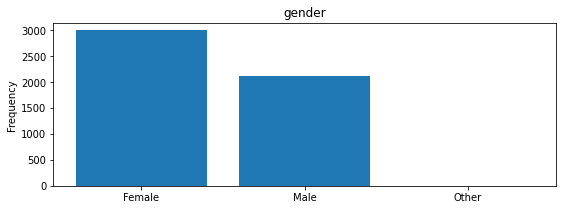

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


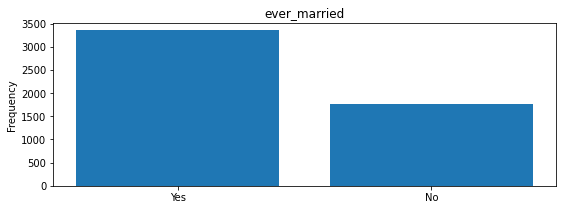

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


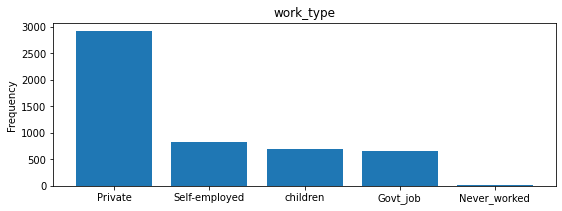

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


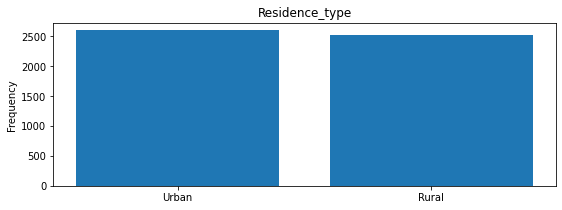

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


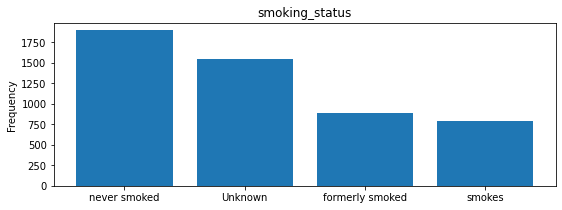

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [ ]:
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for c in categorical_variables:
    bar_plot(c)

In [ ]:
def plot_hist(variable):
    pt.figure(figsize = (9,3))
    pt.hist(new_data[variable], bins = 50)
    pt.xlabel(variable)
    pt.ylabel("Frequency")
    pt.title("{} Distribution with Histogram".format(variable))
    pt.show()

In [ ]:

numerical_values = (new_data.dtypes == "float64")
numerical_values_list = list(numerical_values[numerical_values].index)

print("Numerical variables:")
print(numerical_values_list)



Numerical variables:
['age', 'avg_glucose_level', 'bmi']


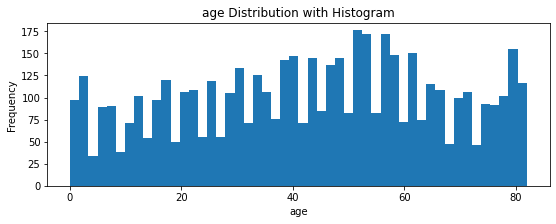

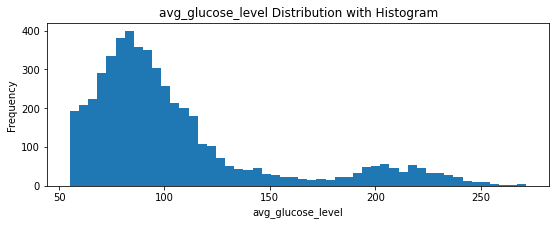

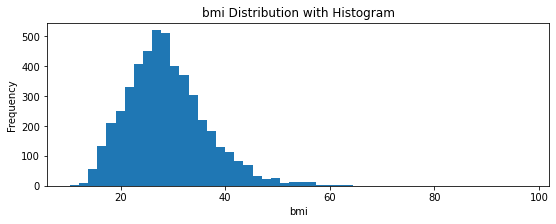

In [ ]:
numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

**Checking for NULL Values**

In [ ]:
new_data[new_data['gender'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
new_data[new_data['age'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
new_data[new_data['hypertension'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
new_data[new_data['heart_disease'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
new_data[new_data['ever_married'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
new_data[new_data['work_type'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
new_data[new_data['Residence_type'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
new_data[new_data['avg_glucose_level'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
new_data[new_data['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
new_data[new_data['smoking_status'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
new_data[new_data['stroke'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


**Removing the NULL Values**

In [ ]:
print("Mean of BMI value for Females: ", np.mean(new_data[new_data['gender'] == 'Female']['bmi']))
print("Mean of BMI value for Males: ", np.mean(new_data[new_data['gender'] == 'Male']['bmi']))
print("Mean of BMI value: ", np.mean(new_data['bmi']))

Mean of BMI value for Females:  29.065757680359038
Mean of BMI value for Males:  28.647936350074616
Mean of BMI value:  28.893236911794673


In [ ]:
new_data['bmi'] = new_data['bmi'].fillna(0)

In [ ]:
for i in range(0,5035):
    if(new_data['bmi'][i] == 0):
        if(new_data['gender'][i] == 'Male'):
            new_data['bmi'][i] = 28.647936350074616
        elif(new_data['gender'][i] == 'Female'):
            new_data['bmi'][i] = 29.065757680359038
        else:
            new_data['bmi'][i] = 28.893236911794673
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
new_data[new_data['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


**Converting Categorical variables into Dummy variables**

In [ ]:
print("Unique Values for Gender", new_data['gender'].unique())
print("Unique Values for ever_married", new_data['ever_married'].unique())
print("Unique Values for work_type", new_data['work_type'].unique())
print("Unique Values for Residence_type", new_data['Residence_type'].unique())
print("Unique Values for smoking_status", new_data['smoking_status'].unique())

Unique Values for Gender ['Male' 'Female' 'Other']
Unique Values for ever_married ['Yes' 'No']
Unique Values for work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique Values for Residence_type ['Urban' 'Rural']
Unique Values for smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
ever_married_mapping = {'No': 0, 'Yes': 1}
new_data['ever_married'] = new_data['ever_married'].map(ever_married_mapping)

In [ ]:
new_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
Residence_type_mapping = {'Rural': 0, 'Urban': 1}
new_data['Residence_type'] = new_data['Residence_type'].map(Residence_type_mapping)

In [ ]:
new_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [ ]:
new_data['gender'] = pd.Categorical(new_data['gender'])
datasetDummies_gender = pd.get_dummies(new_data['gender'], prefix = 'gender_encoded')
datasetDummies_gender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [ ]:
new_data['work_type'] = pd.Categorical(new_data['work_type'])
datasetDummies_work_type = pd.get_dummies(new_data['work_type'], prefix = 'work_type_encoded')
datasetDummies_work_type

,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [ ]:
new_data['smoking_status'] = pd.Categorical(new_data['smoking_status'])
datasetDummies_smoking_status = pd.get_dummies(new_data['smoking_status'], prefix = 'smoking_status_encoded')
datasetDummies_smoking_status

,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [ ]:
new_data.drop("gender", axis=1, inplace=True)
new_data.drop("work_type", axis=1, inplace=True)
new_data.drop("smoking_status", axis=1, inplace=True)
new_data = pd.concat([new_data, datasetDummies_gender], axis=1)
new_data = pd.concat([new_data, datasetDummies_work_type], axis=1)
new_data = pd.concat([new_data, datasetDummies_smoking_status], axis=1)
new_data

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,29.065758,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     5110 non-null   float64
 1   hypertension                            5110 non-null   int64  
 2   heart_disease                           5110 non-null   int64  
 3   ever_married                            5110 non-null   int64  
 4   Residence_type                          5110 non-null   int64  
 5   avg_glucose_level                       5110 non-null   float64
 6   bmi                                     5110 non-null   float64
 7   stroke                                  5110 non-null   int64  
 8   gender_encoded_Female                   5110 non-null   uint8  
 9   gender_encoded_Male                     5110 non-null   uint8  
 10  gender_encoded_Other                    5110 non-null   uint

In [ ]:
stroke_data=new_data["stroke"].copy()
print(stroke_data)

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


In [ ]:
new_data.drop("stroke", axis=1, inplace=True)
new_data = pd.concat([new_data, stroke_data], axis=1)

In [ ]:
new_data

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes,stroke
0,67.0,0,1,1,1,228.69,36.600000,0,1,0,0,0,1,0,0,0,1,0,0,1
1,61.0,0,0,1,0,202.21,29.065758,1,0,0,0,0,0,1,0,0,0,1,0,1
2,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0,0,0,0,1,0,1
3,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,0,1,0,0,0,0,0,1,1
4,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0
5106,81.0,0,0,1,1,125.20,40.000000,1,0,0,0,0,0,1,0,0,0,1,0,0
5107,35.0,0,0,1,0,82.99,30.600000,1,0,0,0,0,0,1,0,0,0,1,0,0
5108,51.0,0,0,1,0,166.29,25.600000,0,1,0,0,0,1,0,0,0,1,0,0,0


**Separating the Independent and Dependent Features**

In [ ]:
X= new_data.iloc[:,:-1].values
y=new_data.iloc[:,-1].values

In [ ]:
X

array([[67.,  0.,  1., ...,  1.,  0.,  0.],
       [61.,  0.,  0., ...,  0.,  1.,  0.],
       [80.,  0.,  1., ...,  0.,  1.,  0.],
       ...,
       [35.,  0.,  0., ...,  0.,  1.,  0.],
       [51.,  0.,  0., ...,  1.,  0.,  0.],
       [44.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

**Creating the Training and Testing Dataset**

In [ ]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5110
Total # of sample in train dataset: 4088
Total # of sample in test dataset: 1022


In [ ]:
X_train

array([[36.,  0.,  0., ...,  1.,  0.,  0.],
       [34.,  0.,  0., ...,  1.,  0.,  0.],
       [60.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [44.,  0.,  0., ...,  0.,  0.,  1.],
       [21.,  0.,  0., ...,  1.,  0.,  0.],
       [58.,  1.,  0., ...,  0.,  1.,  0.]])

**Scaling the Dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.32824306, -0.33206349, -0.23963241, ...,  2.17751533,
        -0.76532697, -0.42963261],
       [-0.41649391, -0.33206349, -0.23963241, ...,  2.17751533,
        -0.76532697, -0.42963261],
       [ 0.73076708, -0.33206349, -0.23963241, ..., -0.45923902,
         1.30663108, -0.42963261],
       ...,
       [ 0.02476032, -0.33206349, -0.23963241, ..., -0.45923902,
        -0.76532697,  2.32757007],
       [-0.9901244 , -0.33206349, -0.23963241, ...,  2.17751533,
        -0.76532697, -0.42963261],
       [ 0.64251624,  3.01147232, -0.23963241, ..., -0.45923902,
         1.30663108, -0.42963261]])

In [ ]:
len(X_train[0])

19

**Creating the Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

model=Sequential()
model.add(Dense(50,activation='relu',input_shape=(19,)))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1000      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 3,601
Trainable params: 3,601
Non-trainable params: 0
_________________________________________________________________


**Training the Model**

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 30,batch_size =3)

Epoch 1/30
1363/1363 [==============================] - 6s 2ms/step - loss: 0.2351 - accuracy: 0.9351
Epoch 2/30
1363/1363 [==============================] - 3s 2ms/step - loss: 0.1474 - accuracy: 0.9553
Epoch 3/30
1363/1363 [==============================] - 3s 2ms/step - loss: 0.1728 - accuracy: 0.9441
Epoch 4/30
1363/1363 [==============================] - 3s 2ms/step - loss: 0.1527 - accuracy: 0.9490
Epoch 5/30
1363/1363 [==============================] - 3s 2ms/step - loss: 0.1453 - accuracy: 0.9509
Epoch 6/30
1363/1363 [==============================] - 3s 2ms/step - loss: 0.1300 - accuracy: 0.9581
Epoch 7/30
1363/1363 [==============================] - 3s 2ms/step - loss: 0.1422 - accuracy: 0.9517
Epoch 8/30
1363/1363 [==============================] - 3s 2ms/step - loss: 0.1184 - accuracy: 0.9619
Epoch 9/30
1363/1363 [==============================] - 3s 2ms/step - loss: 0.1390 - accuracy: 0.9524
Epoch 10/30
1363/1363 [==============================] - 3s 2ms/step - loss: 0.124

**Testing the Model**

In [ ]:
model.evaluate(x = X_test,y = y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.9344


[0.34427666664123535, 0.9344422817230225]

In [ ]:
y_test

array([1, 0, 0, ..., 0, 1, 0])

**Prediction Analysis**

In [ ]:
y_predict=model.predict(X_test)
y_predict

array([[9.2898577e-01],
       [5.6310070e-27],
       [1.2776998e-02],
       ...,
       [4.8571046e-02],
       [2.4115868e-01],
       [8.4749350e-05]], dtype=float32)

In [ ]:
for i in range(0,len(y_test)-1):
  print("error = "+ str(y_test[i]-y_predict[i]))
 

error = [0.07101423]
error = [-5.631007e-27]
error = [-0.012777]
error = [-8.079724e-07]
error = [-5.087104e-23]
error = [-0.00053554]
error = [-3.1334046e-08]
error = [-0.00038733]
error = [-0.01351251]
error = [-0.30108917]
error = [-0.18827368]
error = [-5.1627756e-25]
error = [-8.433131e-22]
error = [-0.5762822]
error = [-1.8421483e-07]
error = [-0.00082812]
error = [-2.860037e-07]
error = [-2.0847425e-05]
error = [-0.00186515]
error = [-0.01936987]
error = [-7.597837e-09]
error = [-7.361503e-25]
error = [-2.4799414e-20]
error = [-3.3833785e-05]
error = [0.96658695]
error = [-0.01600157]
error = [-2.3404734e-15]
error = [-0.01663196]
error = [-1.5882325e-26]
error = [-0.03918773]
error = [-0.00089679]
error = [-0.0004453]
error = [0.96389055]
error = [-2.6928196e-23]
error = [-0.03008372]
error = [-0.01552479]
error = [-0.00886091]
error = [-0.1614559]
error = [-0.01002689]
error = [-5.0276474e-11]
error = [-0.07622115]
error = [-8.186038e-08]
error = [-0.00434748]
error = [-1.1861